## 1.Installing Dependencies

In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
!cd yolov5 & pip install -r requirements.txt

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## 2.Load Model

In [4]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\bhush/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-4-13 Python-3.11.2 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## 3.Make Detections

In [6]:
img = 'https://m.economictimes.com/thumb/msid-60457478,width-1200,height-900,resizemode-4,imgsize-57900/indias-traffic-is-so-bad-its-changing-the-cars-people-buy.jpg'

In [7]:
results = model(img)
results.print()

image 1/1: 900x1200 12 persons, 22 cars, 4 motorcycles, 6 buss
Speed: 1207.8ms pre-process, 140.1ms inference, 70.6ms NMS per image at shape (1, 3, 480, 640)


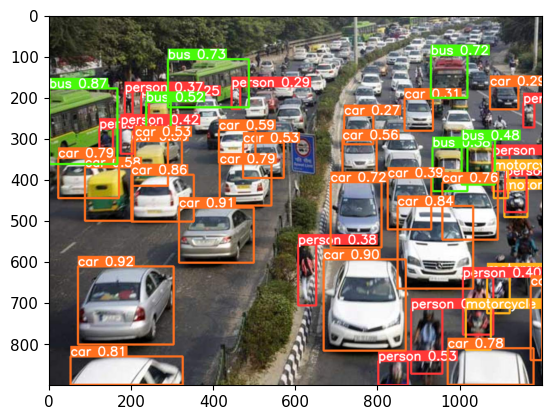

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

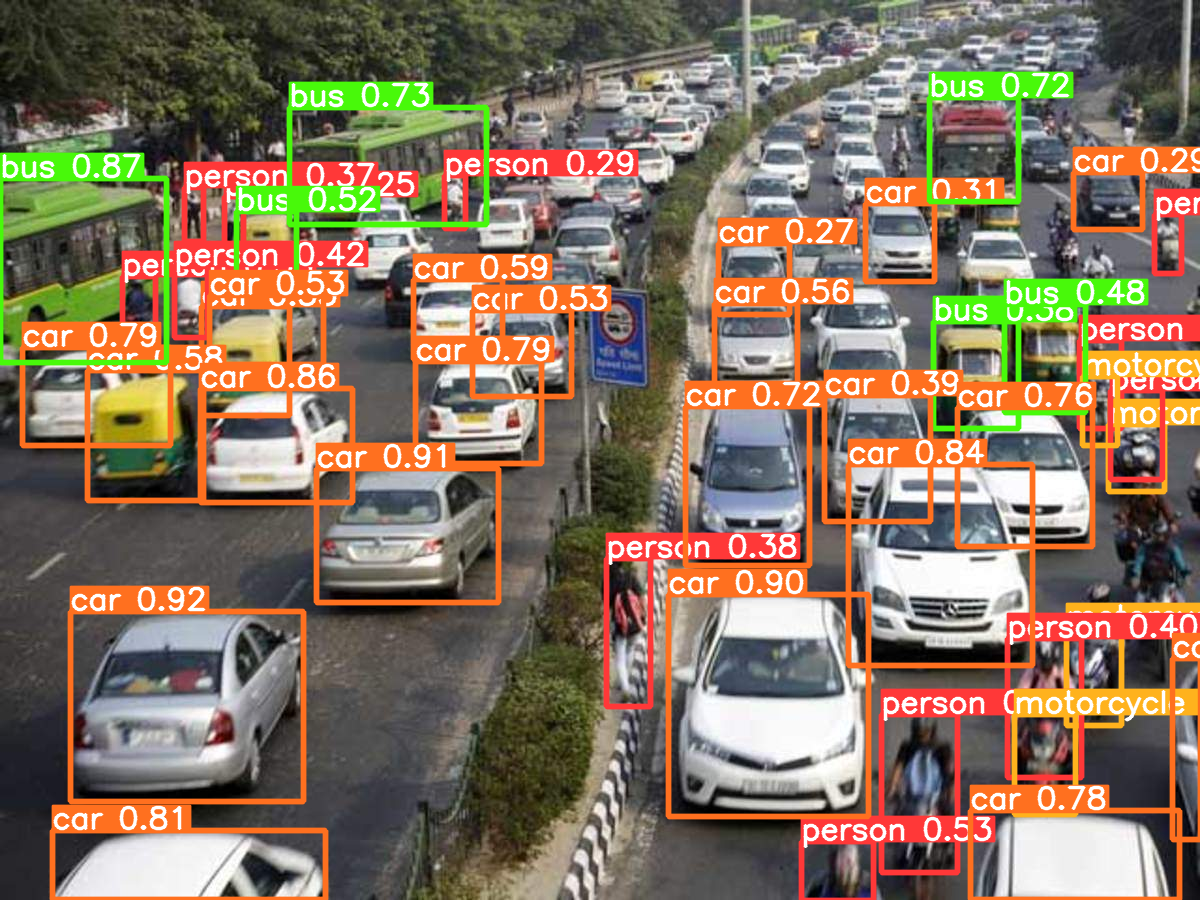

In [9]:
results.show()

In [10]:
np.array(results.render()).shape

(1, 900, 1200, 3)

## 4.Real Time Detections

In [18]:
cap = cv2.VideoCapture(0)
while(cap.isOpened()):
    ret , frame =cap.read()
    
    #make detections
    results = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## 5.Passing a pre-recorded video

In [19]:
cap = cv2.VideoCapture('traffic video.mp4')
while(cap.isOpened()):
    ret , frame =cap.read()
    
    #make detections
    results = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()